# Python: Drugie zadanie domowe

Drugie zadanie domowe będzie polegać na opracowaniu danych zawartych w pliku `gapminder.csv`, który znajduje się w tym katalogu (proszę wykorzystać ten plik, a nie ten w katalogu labs04). Ten arkusz poprowadzi Cię krok po kroku po zadaniu domowym.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**zad. 1** Wczytaj dane do zmiennej `data`, w taki sposób, żeby nazwa Państwa była kluczem.

In [36]:
data = pd.read_csv("gapminder.csv", index_col=0)

**zad. 2** Znajdź najbardziej i najmniej zaludnione państwa na świecie.

In [37]:
data["population"].idxmax(), data["population"].idxmin() 

('China', 'Antigua and Barbuda')

**zad. 3** W ilu państwach współczynnik `female_BMI` jest większy od `male_BMI`.

In [38]:
data["female_BMI"].loc[data["female_BMI"]>data["male_BMI"]].count()

122

**zad. 4**
 1. Zainstaluj bibliotekę `pycountry_convert` i zaimportuj ją.
 1. Dodaj do danych kolumnę `continent`, która będzie zawierać nazwę kontynentu, na którym jest położone dane państwo. Wykorzystaj bibliotekę `pycountry_convert`. *Uwaga*: trzeba najpierw uzystać kod państwa w fomacie ISO-2, następnie uzystkać kod kontynentu, a na końcu uzyskać nazwę kontynentu.

In [39]:
conts = []
for name in data.index:
    country_code = pycountry_convert.convert_countries.country_name_to_country_alpha2(name)
    cont_code = pycountry_convert.convert_country_alpha2_to_continent_code.country_alpha2_to_continent_code(country_code)
    cont = pycountry_convert.convert_continent_code_to_continent_name(cont_code)
    conts.append(cont)
    
data['continent'] = conts
data['continent']

Afghanistan                     Asia
Albania                       Europe
Algeria                       Africa
Angola                        Africa
Antigua and Barbuda    North America
                           ...      
Venezuela              South America
Vietnam                         Asia
Palestine                       Asia
Zambia                        Africa
Zimbabwe                      Africa
Name: continent, Length: 175, dtype: object

**zad. 5**
Oblicz ile osób mieszka na każdym z kontynentów.

In [40]:
data.groupby('continent').sum()

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
continent,,,,,,,
Africa,1259.33213,1181.44512,280335.0,9.772803e+08,4763.00,3136.10,246.50
Asia,1114.28765,1084.74598,1038232.0,3.949400e+09,1302.98,3201.41,108.48
Europe,980.30978,1009.60877,1173410.0,7.219954e+08,273.60,2929.30,59.56
North America,526.06040,497.74034,338430.0,5.235798e+08,392.38,1412.20,45.00
Oceania,297.20093,279.58957,102803.0,3.425711e+07,310.00,683.20,34.02
South America,322.37322,308.59791,139888.0,3.881582e+08,288.70,886.80,30.10


**zad. 6** Narysyj wykres słupkowy pokazujący ile państw leży na każdym z kontynentów.

C:\programy\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


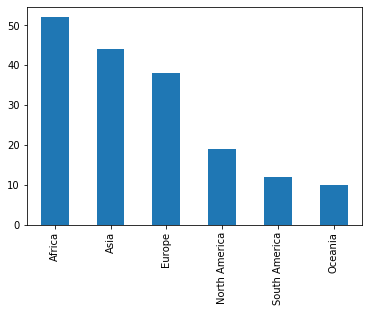

In [41]:
data.continent.value_counts().plot('bar')

**zad. 7** 
 * Kolumna `gdp` zawiera informacje o PKB na obywatela. Stwórz nową kolumnę `gdp_total`, która będzie informować o PKB danego kraju.
 * Oblicz ile wynosi suma światowego PKB (kolumna `gdp_total`).
 * Oblicz ile krajów jest odpowiedzialnych za wytworzenie 80% światego PKB.

In [42]:
data["gdp_total"]=data["gdp"]*data["population"]
data["gdp_total"]

Afghanistan            3.477918e+10
Albania                2.565562e+10
Algeria                4.286634e+11
Angola                 1.409395e+11
Antigua and Barbuda    2.196568e+09
                           ...     
Venezuela              5.035985e+11
Vietnam                3.537175e+11
Palestine              1.373803e+10
Zambia                 3.985521e+10
Zimbabwe               1.735516e+10
Name: gdp_total, Length: 175, dtype: float64

In [43]:
sum(data["gdp_total"])

83385987338947.0

In [44]:
sorted_PKB=data.sort_values("gdp_total",ascending=False)
tmp_sum=0
procent=0
count=0
for index,row in sorted_PKB.iterrows():
    tmp_sum=tmp_sum+(row["gdp_total"]/sum(data["gdp_total"]))*100
    if tmp_sum<=80:
        procent=tmp_sum
        count=sorted_PKB.index.get_loc(index)+1
    else:
        break
        
count #24

24

**zad. 8** Wyświetl wszystkie europejskie państwa, w których oczekiwana długość życia wynosi conajmniej 80 lat. 

In [45]:
data.loc[(data["life_expectancy"]>=80) & (data["continent"]=="Europe")]

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,continent,gdp_total
Austria,25.09414,26.46741,43952.0,8331465.0,4.6,80.4,1.41,Europe,3.661845e+11
France,24.82949,25.85329,37505.0,62309529.0,4.3,81.1,1.97,Europe,2.336919e+12
Germany,25.73903,27.16509,41199.0,80665906.0,4.4,80.0,1.37,Europe,3.323355e+12
Greece,24.92026,26.33786,32197.0,11161755.0,4.9,80.2,1.46,Europe,3.593750e+11
Iceland,26.02599,27.20687,42294.0,310033.0,2.7,82.4,2.12,Europe,1.311254e+10
Ireland,26.62176,27.65325,47713.0,4480145.0,4.5,80.1,2.00,Europe,2.137612e+11
Italy,24.79289,26.48020,37475.0,59319234.0,4.1,81.5,1.39,Europe,2.222988e+12
Luxembourg,26.09326,27.43404,95001.0,485079.0,2.8,81.0,1.63,Europe,4.608299e+10
Malta,27.04993,27.68361,27872.0,406392.0,6.6,80.7,1.38,Europe,1.132696e+10
Netherlands,25.47269,26.01541,47388.0,16519862.0,4.8,80.3,1.77,Europe,7.828432e+11


**zad. 9** Znajdź państwo, które ma najbardziej zbliżone PKB do Polski. Spróbuj rozwiązać to zadanie w jednej linijce.

In [46]:
min(({index:abs(data["gdp"].loc["Poland"]-row["gdp"]) for index, row in data.iterrows() if index!='Poland' }).items(), key=lambda x: x[1])

('Malaysia', 28.0)

**zad. 10 (ostatnie)**
 * Zobacz czy masz zainstalowaną bibliotekę `requests`, która sluży do wykonywania zapytań HTTP. Jeżeli nie, to zainstaluj ją. 
 * Uruchom z funkcję `requests.get` podając jako argument link: `https://aws.random.cat/meow`. Wynik zapisz do zmiennej response.
 * Wykonaj metodę `json()` na zmiennej `response` która zwróci Ci słownik, w którym będzie klucz `file`. Zapisz wartość `file` do zmiennej `url`.
 * Zaimportuj `Image` i `display` z biblioteki `from IPython.core.display`.
 * Stwórz obiekt Image podając w konstruktorze zmienną `url`,a wynik zapisz do `image`.
 * Wykonaj funkcję `display` na obiekcie `image`.
 

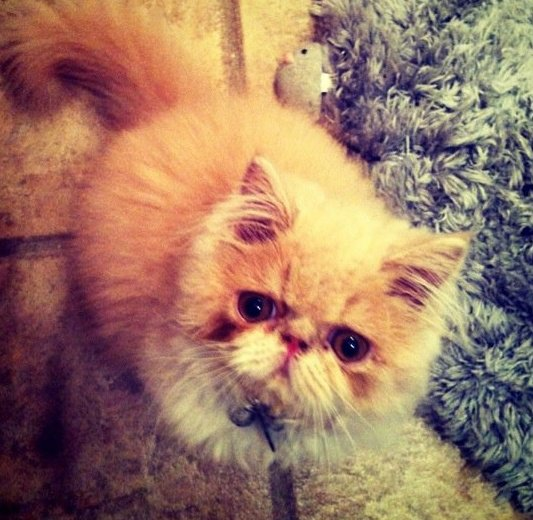

In [49]:
import requests
requests = requests.get('https://aws.random.cat/meow')
url=requests.json()['file']

from IPython.core.display import display,Image
image=Image(url)
display(image)